# Final Project Program

1. Pranav Gupta     (22B2179)
2. Gokul Rajaraman  (22B4517)
3. Vedant Tayade    (22B2205)

video:  https://drive.google.com/file/d/13YZ3zTwarpxDbH6T4jvG-Np_8r-RE3hv/view?usp=sharing\
data:   https://drive.google.com/file/d/1RnE6vO_yRpFytjdFp5Zf6ASvBQLvqOar/view?usp=sharing

## data loading and processing

#### importing requisite python modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

2024-05-05 01:14:26.046419: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 01:14:26.046465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 01:14:26.047529: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-05 01:14:26.053731: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 01:14:26.799220: W tensorflow/compiler/tf2

#### importing dataset

In [2]:
data = pd.read_csv('final_data.csv')
data.head()

,x,y,theta,phidot_l,phidot_r,r,theta_measured
0,1.000000,5.000000,0.087220,7.848982,0.000000,5.099020,-0.014105
1,1.008090,5.000287,-0.014105,7.848982,0.498343,5.100894,-0.108839
2,1.016663,4.999751,-0.108839,7.848983,0.986978,5.102069,-0.197173
3,1.025626,4.998360,-0.197173,7.848983,1.457284,5.102501,-0.279396
4,1.034883,4.996104,-0.279396,7.848984,1.902532,5.102160,-0.355876


#### creating training dataset

In [3]:
# selecting the first 7000 trajectories for training
train = data[:700000]

# processing and labelling the data
sequences = []
next_values = []
for i in range(len(train) - 1):
    sequences.append(train.iloc[i].values.reshape(1, -1))
    next_values.append(train.iloc[i+1][:3].values)

sequences = np.array(sequences)
next_values = np.array(next_values)

## model training

In [4]:
# Define the model
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.GRU(units=hp.Int('units_1', min_value=32, max_value=1024, step=64),
                         return_sequences=True,
                         input_shape=(sequences.shape[1], sequences.shape[2])))
    model.add(layers.GRU(units=hp.Int('units_2', min_value=64, max_value=1024, step=64)))
    model.add(layers.Dense(3))
    model.compile(optimizer='adam', loss='mse')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Total number of trials (model configurations) to test
    executions_per_trial=1,  # Number of executions per trial (i.e., training runs)
    directory='keras_tuner',
    project_name='gru_hyperparameter_optimization'
)

tuner.search(sequences, next_values, epochs=7, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps}")
best_model = tuner.hypermodel.build(best_hps)

best_model.fit(sequences, next_values, epochs=25, validation_split=0.2)

# Save the model
best_model.save("best_gru_model")

Trial 5 Complete [00h 15m 04s]
val_loss: 2.263721466064453

Best val_loss So Far: 2.263721466064453
Total elapsed time: 00h 59m 17s
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7fe0f7547760>
Epoch 1/25
17500/17500 [==============================] - 130s 7ms/step - loss: 1.3300 - val_loss: 3.1983
Epoch 2/25
17500/17500 [==============================] - 129s 7ms/step - loss: 1.1101 - val_loss: 3.0099
Epoch 3/25
17500/17500 [==============================] - 130s 7ms/step - loss: 1.1020 - val_loss: 4.3159
Epoch 4/25
17500/17500 [==============================] - 129s 7ms/step - loss: 1.0387 - val_loss: 3.9491
Epoch 5/25
17500/17500 [==============================] - 127s 7ms/step - loss: 0.7801 - val_loss: 3.9541
Epoch 6/25
17500/17500 [==============================] - 129s 7ms/step - loss: 0.6827 - val_loss: 4.6595
Epoch 7/25
17500/17500 [==============================] - 129s 7ms/step - loss: 1.0418 - val_loss: 3.6074
Epoch 

INFO:tensorflow:Assets written to: best_gru_model/assets


## model testing

#### loading saved model

In [5]:
model = tf.keras.models.load_model("best_gru_model")

2024-05-05 01:15:10.578387: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-05 01:15:10.578423: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: asusA15-FA506QM
2024-05-05 01:15:10.578430: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: asusA15-FA506QM
2024-05-05 01:15:10.578574: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 550.54.15
2024-05-05 01:15:10.578595: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 550.54.15
2024-05-05 01:15:10.578601: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 550.54.15


#### creating test dataset

In [6]:
test = data[700000:]    # demarcating remaining trajectories as test dataset
model_in = test.values.reshape(-1, 1, 7)  # reshape to match the model's input shape
y_pred = model.predict(model_in)    # result from model
y_true = test.values[0:, 0:3]       # ground truth value

9375/9375 [==============================] - 44s 5ms/step


#### model performance results on test data

In [7]:
from tensorflow.keras.metrics import R2Score, RootMeanSquaredError

r2 = R2Score()
r2.update_state(y_true, y_pred)
print("R2Score:", r2.result())

rmse = RootMeanSquaredError()
rmse.update_state(y_true, y_pred)
print("RMSE:", rmse.result())

R2Score: tf.Tensor(0.7209325, shape=(), dtype=float32)
RMSE: tf.Tensor(2.2756414, shape=(), dtype=float32)


#### function to return actual and estimated states in $n^\text{th}$ trajectory

In [8]:
def result(n):
    sequence = data.iloc[n*100+1:(n+1)*100].values

    # preparing the model input for prediction
    model_input = sequence[:-1].reshape(-1, 1, 7)  # Reshape to match the model's input shape
    
    pred = model.predict(model_input)
    true = sequence[1:, :3]
    
    return true, pred 

#### plotting actual vs. estimated trajectories

4/4 [==============================] - 0s 5ms/step


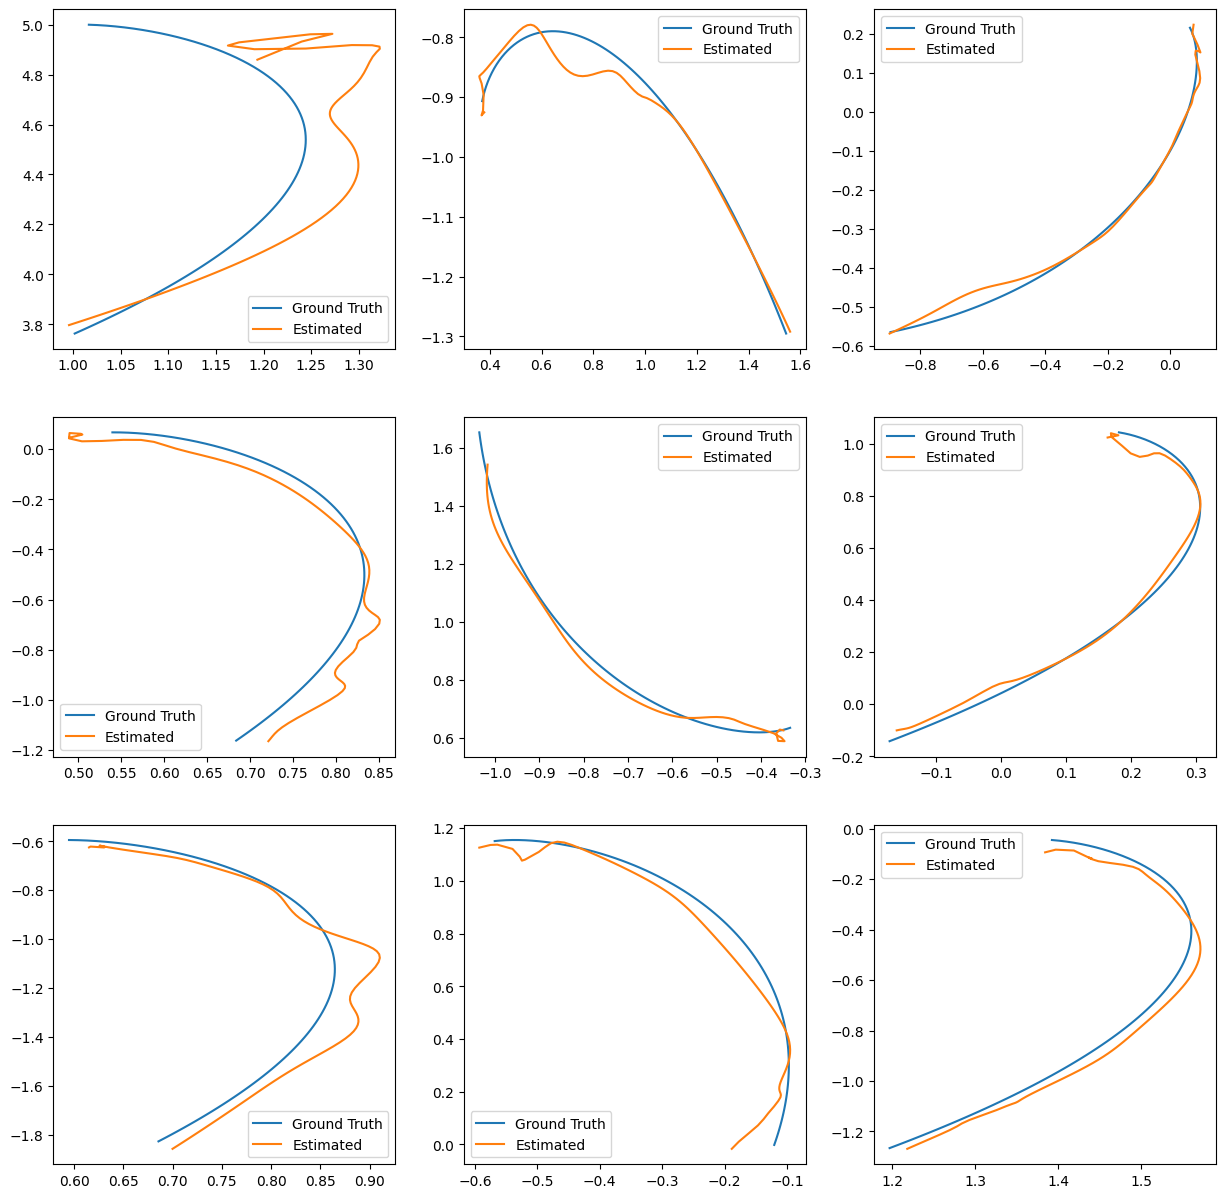

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15,15))

N = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in range(3):
    for j in range(3):
        n = 3*i+j
        out_true, out_pred = result(n) 
        true_x, true_y = out_true[:, 0], out_true[:, 1]
        pred_x, pred_y = out_pred[:, 0], out_pred[:, 1]
        ax[i,j].plot(true_x, true_y, label='Ground Truth')  # plot actual trajectory
        ax[i,j].plot(pred_x, pred_y, label='Estimated')     # plot estimated trajectory
        ax[i,j].legend()

plt.show()